In [1]:
############# LSTM

In [97]:
import quandl
quandl.ApiConfig.api_key = 'ik6y9JyGpmnDBkJjiF2Y'

# get the table for daily stock prices and,
# filter the table for selected tickers, columns within a time range
# set paginate to True because Quandl limits tables API to 10,000 rows per call
data = quandl.get_table('WIKI/PRICES', ticker = ['GOOGL'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2014-12-31', 'lte': '2018-3-21' }, 
                        paginate=True)
data = data.sort_values(by='date', ascending=True)
data = data.reset_index(drop = True)
data.head()

,ticker,date,adj_close
0,GOOGL,2014-12-31,530.66
1,GOOGL,2015-01-02,529.55
2,GOOGL,2015-01-05,519.46
3,GOOGL,2015-01-06,506.64
4,GOOGL,2015-01-07,505.15


In [118]:
data.to_excel('Google_2014-12-31_to_2018-3-21.xlsx')

In [98]:
pred_days = 15

In [99]:
dataset_test = data.iloc[-pred_days:,:]
dataset_test

,ticker,date,adj_close
795,GOOGL,2018-03-01,1071.41
796,GOOGL,2018-03-02,1084.14
797,GOOGL,2018-03-05,1094.76
798,GOOGL,2018-03-06,1100.90
799,GOOGL,2018-03-07,1115.04
800,GOOGL,2018-03-08,1129.38
801,GOOGL,2018-03-09,1160.84
802,GOOGL,2018-03-12,1165.93
803,GOOGL,2018-03-13,1139.91
804,GOOGL,2018-03-14,1148.89


In [100]:
data.date.max()

Timestamp('2018-03-21 00:00:00')

In [101]:
data.date.min()

Timestamp('2014-12-31 00:00:00')

In [102]:
dataset_train= data.iloc[:-pred_days,1:3]
dataset_train.head()

,date,adj_close
0,2014-12-31,530.66
1,2015-01-02,529.55
2,2015-01-05,519.46
3,2015-01-06,506.64
4,2015-01-07,505.15


In [103]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
#dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
## only get training column open 

In [104]:
dataset_train.head()

,date,adj_close
0,2014-12-31,530.66
1,2015-01-02,529.55
2,2015-01-05,519.46
3,2015-01-06,506.64
4,2015-01-07,505.15


In [105]:
n = dataset_train.shape[0]
n

795

In [106]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [107]:
# Creating a data structure with 60 timesteps and 1 output
######### slicing window 
X_train = []
y_train = []
for i in range(60, n):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [108]:
X_train.shape[0]

735

In [109]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [110]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
735/735 [==============================] - 7s 10ms/step - loss: 0.0590
Epoch 2/100
735/735 [==============================] - 4s 5ms/step - loss: 0.0084
Epoch 3/100
735/735 [==============================] - 4s 5ms/step - loss: 0.0055
Epoch 4/100
735/735 [==============================] - 4s 5ms/step - loss: 0.0052
Epoch 5/100
735/735 [==============================] - 4s 5ms/step - loss: 0.0044
Epoch 6/100
735/735 [==============================] - 4s 5ms/step - loss: 0.0047
Epoch 7/100
735/735 [==============================] - 4s 6ms/step - loss: 0.0076
Epoch 8/100
735/735 [==============================] - 4s 6ms/step - loss: 0.0052
Epoch 9/100
735/735 [==============================] - 4s 6ms/step - loss: 0.0047
Epoch 10/100
735/735 [==============================] - 5s 6ms/step - loss: 0.0043
Epoch 11/100
735/735 [==============================] - 4s 6ms/step - loss: 0.0045
Epoch 12/100
735/735 [==============================] - 4s 6ms/step - loss: 0.0043
Epoch 13/100

735/735 [==============================] - 4s 6ms/step - loss: 0.0016
Epoch 100/100
735/735 [==============================] - 4s 6ms/step - loss: 0.0017


In [111]:
#import quandl
#quandl.ApiConfig.api_key = 'ik6y9JyGpmnDBkJjiF2Y'

# get the table for daily stock prices and,
# filter the table for selected tickers, columns within a time range
# set paginate to True because Quandl limits tables API to 10,000 rows per call
#data_test = quandl.get_table('WIKI/PRICES', ticker = ['GOOGL'], 
                       # qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                       # date = { 'gte': '2017-11-13', 'lte': '2017-12-13' }, 
                        #paginate=True)
#data_test = data.sort_values(by='date', ascending=True)
#dataset_test = data_test 

In [112]:
test_num = dataset_test.shape[0]

In [113]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
#dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test['adj_close'].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['adj_close'], dataset_test['adj_close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, test_num +60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [114]:
dataset_test.shape

(15, 3)

In [115]:
predicted_stock_price.shape

(15, 1)

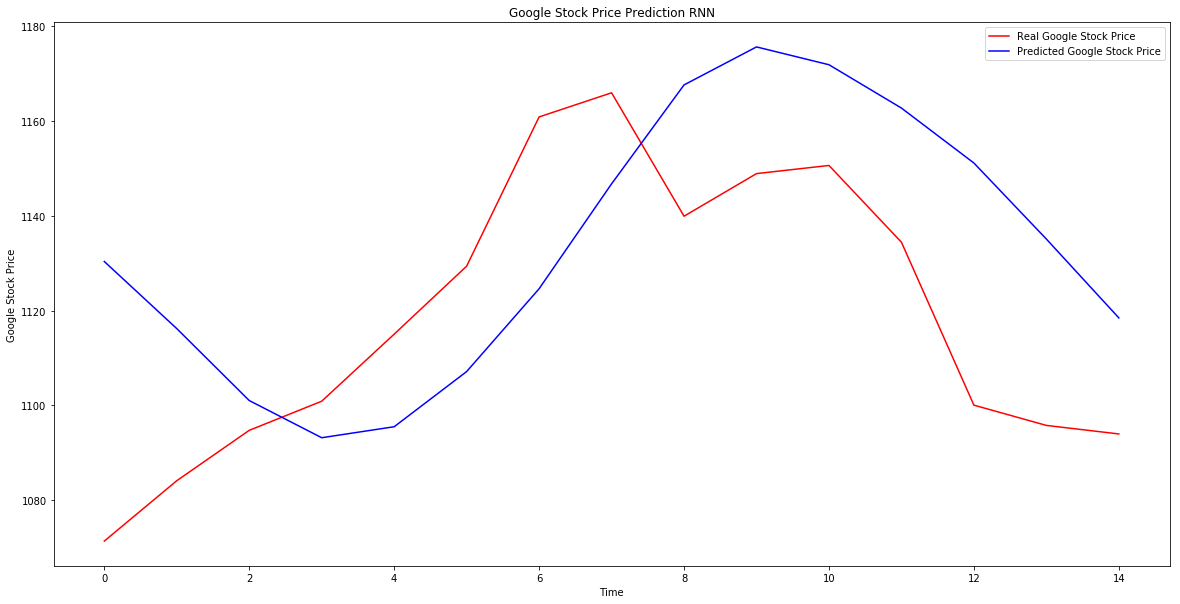

In [119]:
# Visualising the results
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction RNN')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [117]:
####### lstm is used to observe the direction, no use for calculate mse 
## good job deal with smooth change, 
## can react fast to non linear change . 